In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# Load Dataset
 - PassengerId: A unique identifier for each passenger
 - Survived: A binary variable indicating whether the passenger survived (1) or did not survive (0)
 - Pclass: A categorical variable indicating the passenger's class (1 = first class, 2 = second class, 3 = third class)
 - Name: The passenger's name
 - Sex: The passenger's gender (male or female)
 - Age: The passenger's age
 - SibSp: The number of siblings or spouses the passenger had on board
 - Parch: The number of parents or children the passenger had on board
 - Ticket: The passenger's ticket number
 - Fare: The fare the passenger paid for their ticket
 - Cabin: The passenger's cabin number
 - Embarked: The port from which the passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

In [2]:
df = pd.read_csv("modified_titanic_data1.csv")
# .head shows the first n rows of the dataset, default 10
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,OnboardTime,Unnamed: 13
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1912-04-10 09:42:47,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,-,1,0,PC 17599,71.2833,C85,C,1912-04-10 09:54:01,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1912-04-10 09:55:37,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,na,1,0,113803,53.1000,C123,S,1912-04-10 08:06:51,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1912-04-10 09:10:39,NaN


In [3]:
#This 
df = df.drop(columns=["Unnamed: 13","Ticket"]) 
# Is similar to this
# titanic_df.drop(columns="Unnamed: 13",inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,OnboardTime
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,NaN,S,1912-04-10 09:42:47
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,-,1,0,71.2833,C85,C,1912-04-10 09:54:01
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,NaN,S,1912-04-10 09:55:37
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,na,1,0,53.1000,C123,S,1912-04-10 08:06:51
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,NaN,S,1912-04-10 09:10:39


In [4]:

df.drop_duplicates(inplace=True)

<Axes: xlabel='Sex', ylabel='Count'>

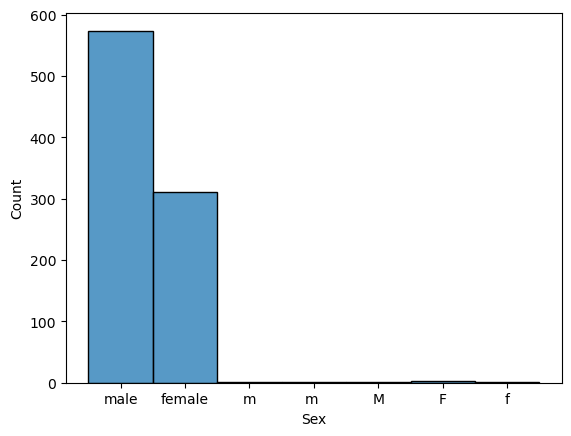

In [5]:
# df["Sex"].hist(backend='plotly')
sns.histplot(df['Sex'])

<Axes: xlabel='Embarked', ylabel='Count'>

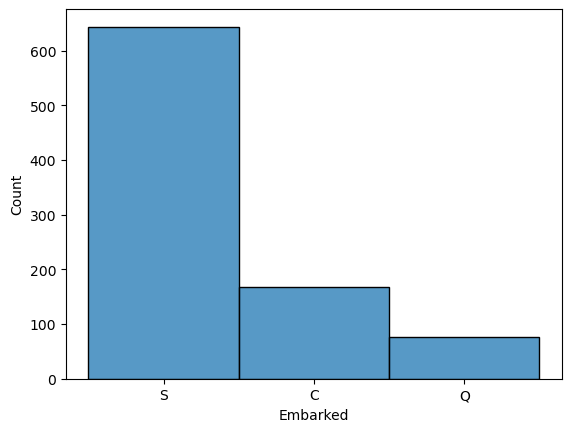

In [6]:
sns.histplot(df['Embarked'])

<Axes: xlabel='Sex', ylabel='Count'>

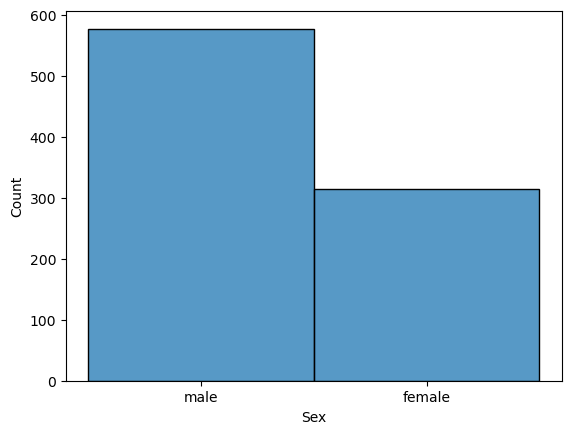

In [7]:
#This operation only maps values on the "Sex" column
df["Sex"] = df["Sex"].map({
    "male": "male",
    "m": "male",
    "m ": "male",
    "M": "male",
    "F": "female",
    "f": "female",
    "female": "female"
})
df["Sex"].unique()
sns.histplot(df['Sex'])

/tmp/ipykernel_2365/1071915040.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


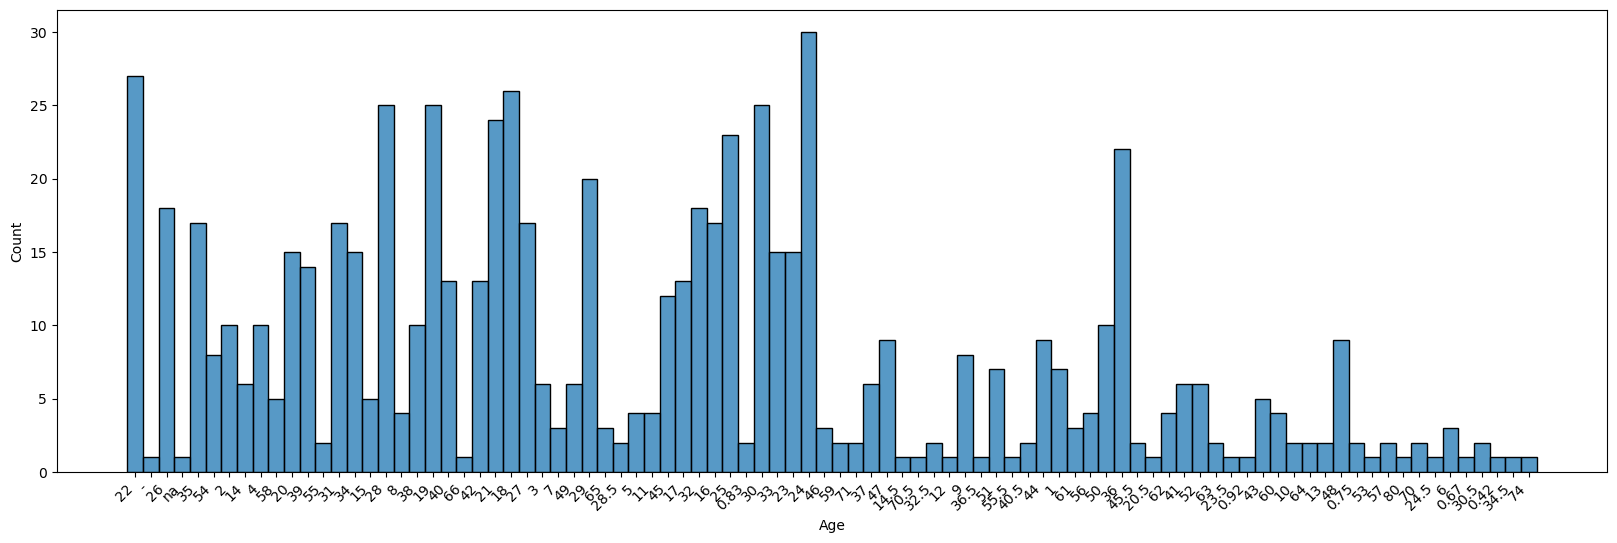

In [8]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.histplot(df['Age'],ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [9]:
df['Age'].head()

0    22
1     -
2    26
3    na
4    35
Name: Age, dtype: object

In [10]:
df['Age'] = df['Age'].replace('-', np.NaN)
df['Age'] = df['Age'].replace('na', np.NaN)
df["Age"].head(10) 

0     22
1    NaN
2     26
3    NaN
4     35
5    NaN
6     54
7      2
8    NaN
9     14
Name: Age, dtype: object

# Cleaning NaN values

In [11]:
null_fare_df = df[df['Fare'].isna()].head()
null_fare_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,OnboardTime
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,NaN,E46,S,1912-04-10 08:42:00
20,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,NaN,NaN,C,1912-04-10 09:32:07
22,22,1,2,"Beesley, Mr. Lawrence",male,34,0,0,NaN,D56,S,1912-04-10 08:03:48
32,31,0,1,"Uruchurtu, Don. Manuel E",male,40,0,0,NaN,NaN,C,1912-04-10 08:20:43
50,49,0,3,"Samaan, Mr. Youssef",male,NaN,2,0,NaN,NaN,C,1912-04-10 08:25:23


In [12]:
#But we could also get the different mean per pclass 
grouped = df.groupby(['Pclass'])['Fare'].mean()
#And use those means to fill the null values
fare_mean = df['Pclass'].map(grouped)
#Fill the null using the fare of Pclass
df_mean_per_class = df.copy()
df_mean_per_class['Fare'].fillna(fare_mean, inplace=True)
df_mean_per_class.loc[null_fare_df.index]
df['Fare'] = df_mean_per_class['Fare']

In [13]:
df['SibSp'] = df['SibSp'].replace(np.NaN, 0)
df['Parch'] = df['Parch'].replace(np.NaN, 0)

<Axes: xlabel='Survived', ylabel='Count'>

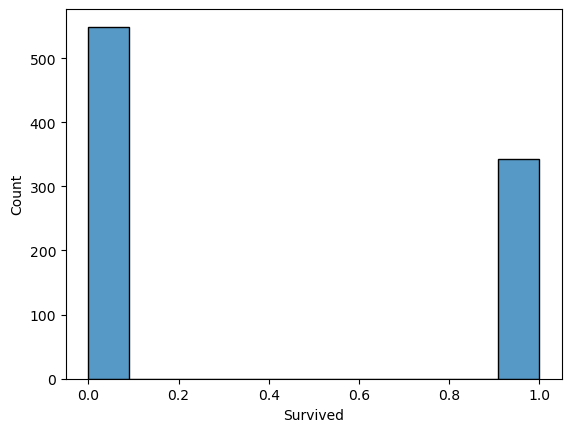

In [14]:
sns.histplot(df['Survived'])

In [15]:

df_test = df.drop(['PassengerId'], axis=1)

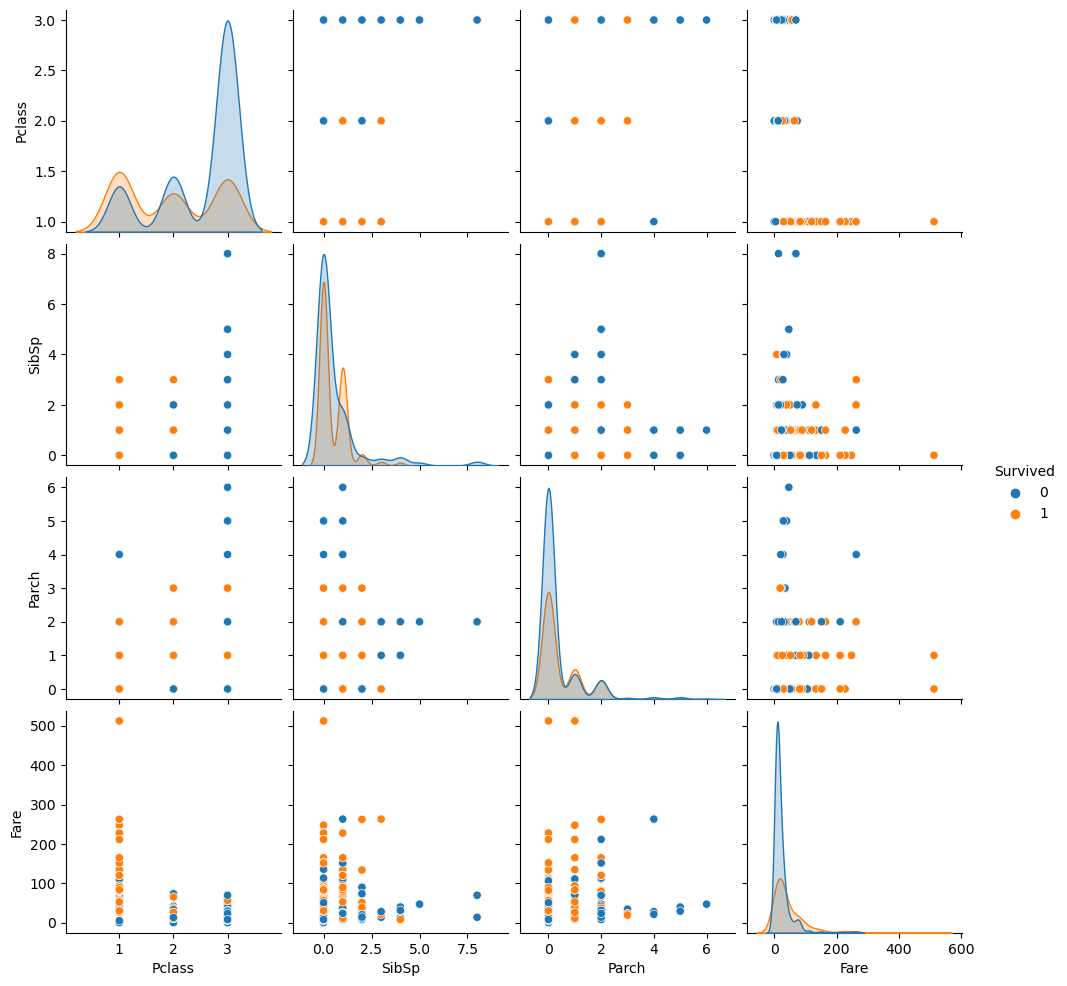

In [16]:
sns.pairplot(df_test, hue='Survived')

/tmp/ipykernel_2365/4017679445.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_test.corr(), annot=True)


<Axes: >

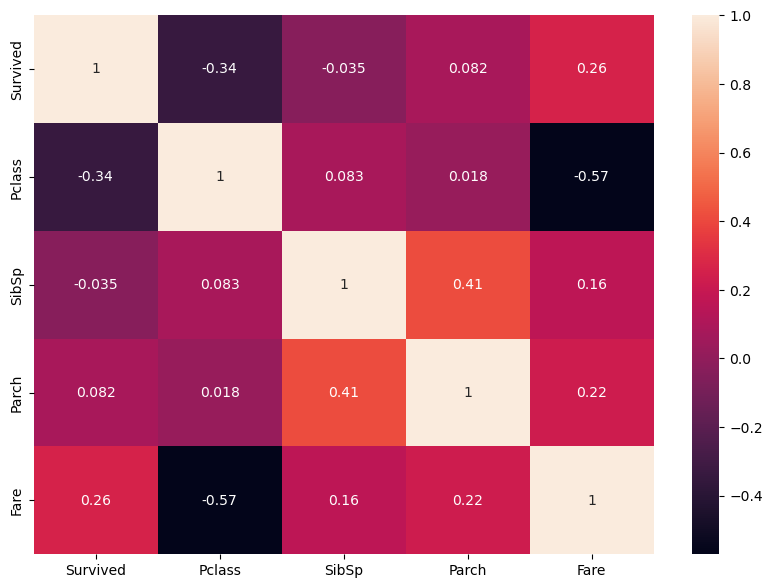

In [17]:
plt.figure(figsize=(10, 7))
sns.heatmap(df_test.corr(), annot=True)

survivors have a correlation with fare price meaning people who paid more had a better chance of survival

# Ensemble learning

In [18]:
null_fare_df = df_test[df_test['Survived'].isna()].head()
null_fare_df
df_test[df_test['SibSp'].isna()].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,OnboardTime


In [19]:

def print_sum(model,X,y):
    # Compute score
    score = model.score(X,y)
    print("SCORE: %.2f" % score)
    print('-'*60)

    # Get summary report
    ypred = model.predict(X)
    report = classification_report(y, ypred)
    print(f'Classification Report:\n{report}')
    print('-'*60)

    # Get confusion matrix
    cm = confusion_matrix(y, ypred)
    print(f'Confusion Matrix:\n{cm}')
    print('-'*60)
    # Plot confusion matrix
    fig, ax = plt.subplots(figsize=(8,6), dpi=100)
    display = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
    ax.set(title="Confusion Matrix for Iris dataset")

    display.plot(ax=ax)
    plt.show()


In [20]:
X = df_test.drop(['Survived', 'Name','Cabin', 'Embarked', 'OnboardTime', 'Age'], axis=1)
df_test['Sex'].replace( 'female', 0,inplace=True)
df_test['Sex'].replace('male', 1,inplace=True)
X = df_test[['Fare', 'Pclass', 'SibSp']]
y = df_test['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
from ex1_ensemble_galang import trainBaggingLogReg

train_bagging = trainBaggingLogReg(0.5, 5, X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy())

indiv_results = train_bagging['ensembleResults']
accuracy = (indiv_results['accuracy'])
indiv_results.pop('accuracy')
df_bagging = pd.DataFrame.from_dict(indiv_results, orient='index') 
print('Ensemble Accuracy: ', accuracy)
df_bagging.head()

Ensemble Accuracy:  0.6977611940298507


,precision,recall,f1-score,support
0,0.697917,0.853503,0.767908,157
1,0.697368,0.477477,0.566845,111
macro avg,0.697643,0.665490,0.667377,268
weighted avg,0.697690,0.697761,0.684632,268


In [30]:
for i in train_bagging['individualResults']:
    indiv_results = i
    accuracy = (indiv_results['accuracy'])
    indiv_results.pop('accuracy')
    df_bagging = pd.DataFrame.from_dict(indiv_results, orient='index') 
    print('Individual Accuracy: ', accuracy)
    print(df_bagging.head())
    print('='*60)

Individual Accuracy:  0.6977611940298507
              precision    recall  f1-score  support
0              0.697917  0.853503  0.767908      157
1              0.697368  0.477477  0.566845      111
macro avg      0.697643  0.665490  0.667377      268
weighted avg   0.697690  0.697761  0.684632      268
Individual Accuracy:  0.6940298507462687
              precision    recall  f1-score  support
0              0.696335  0.847134  0.764368      157
1              0.688312  0.477477  0.563830      111
macro avg      0.692323  0.662306  0.664099      268
weighted avg   0.693012  0.694030  0.681309      268
Individual Accuracy:  0.6977611940298507
              precision    recall  f1-score  support
0              0.697917  0.853503  0.767908      157
1              0.697368  0.477477  0.566845      111
macro avg      0.697643  0.665490  0.667377      268
weighted avg   0.697690  0.697761  0.684632      268
Individual Accuracy:  0.6977611940298507
              precision    recall  f1-sco

In [26]:

from ex2_ensemble_galang import trainBoostingLogReg

train_boosting_log_reg = trainBoostingLogReg(0.5, 5, X_train.to_numpy(), X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy())

indiv_results = train_boosting_log_reg['ensembleResults']
accuracy = (indiv_results['accuracy'])
indiv_results.pop('accuracy')
df_bagging = pd.DataFrame.from_dict(indiv_results, orient='index') 
print('Ensemble Accuracy: ', accuracy)
df_bagging.head()



Ensemble Accuracy:  0.6194029850746269


,precision,recall,f1-score,support
0,0.650273,0.757962,0.700000,157
1,0.552941,0.423423,0.479592,111
macro avg,0.601607,0.590693,0.589796,268
weighted avg,0.609960,0.619403,0.608712,268


In [28]:

for i in train_boosting_log_reg['individualResults']:
    indiv_results = i
    accuracy = (indiv_results['accuracy'])
    indiv_results.pop('accuracy')
    df_bagging = pd.DataFrame.from_dict(indiv_results, orient='index') 
    print('Individual Accuracy: ', accuracy)
    print(df_bagging.head())
    print('='*60)

Individual Accuracy:  0.664179104477612
              precision    recall  f1-score  support
0              0.655814  0.898089  0.758065      157
1              0.698113  0.333333  0.451220      111
macro avg      0.676964  0.615711  0.604642      268
weighted avg   0.673333  0.664179  0.630976      268
Individual Accuracy:  0.5932835820895522
              precision    recall  f1-score  support
0              0.660000  0.630573  0.644951      157
1              0.508475  0.540541  0.524017      111
macro avg      0.584237  0.585557  0.584484      268
weighted avg   0.597241  0.593284  0.594863      268
Individual Accuracy:  0.5485074626865671
              precision    recall  f1-score  support
0              0.590909  0.745223  0.659155      157
1              0.428571  0.270270  0.331492      111
macro avg      0.509740  0.507747  0.495323      268
weighted avg   0.523672  0.548507  0.523444      268
Individual Accuracy:  0.5410447761194029
              precision    recall  f1-scor

KeyError: 'accuracy'